# Lecture 6-3

# Traditional Statistical Models with statsmodels

## Week 6 Friday

## Miles Chen, PhD

References:
+ https://www.statsmodels.org/stable/index.html

# Fitting traditional models

The most popular Python package for modeling is scikit learn. Scikit-learn is not the best for a 'traditional' stats approach.

The statsmodels library is better suited for traditional stats.

`statmodels` offers a few ways to fit models:

+ The standard approach uses matrix notation. This is imported with `import statsmodels.api as sm`
+ statsmodels also offers a formula approach, which will be familiar to those accustomed to R's formula notation. This is imported with `statsmodels.formula.api as smf`
+ statsmodels also offers tools for time series analysis (not covered here). The time series tools are imported with `import statsmodels.tsa.api as tsa`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Example Datasets

You can import datasets from R packages. Use `sm.datasets.get_rdataset( name_of_data, name_of_R_package )`

In [2]:
# Inside the R package "carData", there is a dataset call "Duncan"
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")

The Duncan data frame has 45 rows and 4 columns. Data on the prestige and other characteristics of 45 U. S. occupations in 1950.

- **`type`**: Type of occupation. A factor with the following levels: `prof`, professional and managerial; `wc`, white-collar; `bc`, blue-collar.
- **`income`**: Percentage of occupational incumbents in the 1950 US Census who earned \\$3,500 or more per year
- **`education`**: Percentage of occupational incumbents in 1950 who were high school graduates
- **`prestige`**: Percentage of respondents in a social survey who rated the occupation as "good" or better in prestige

In [3]:
duncan_prestige.data.shape # 45 observations, 4 variables (3 are numeric)

(45, 4)

In [4]:
duncan_prestige.data

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90
minister,prof,21,84,87
professor,prof,64,93,93
dentist,prof,80,100,90
reporter,wc,67,87,52
engineer,prof,72,86,88


# A Simple OLS Example

I enter the values as arrays: one for the `x` values and one for the `y` values.

We'll fit a simple model seeing if there is a relationship between education and income.

In [5]:
Y = duncan_prestige.data['income']
X = duncan_prestige.data['education']

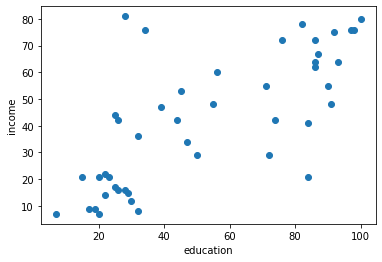

In [6]:
plt.scatter(X, Y)
plt.xlabel("education")
plt.ylabel("income")
plt.show()

## Matrix notation for OLS

The regular statsmodel OLS model uses matrix notation.

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

$$\hat y = \beta_0 + \beta_1 x_i$$

$$
\mathbf{X}\boldsymbol{\beta} = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N 
\end{bmatrix} \times 
\begin{bmatrix}
\beta_0 \\
\beta_1 
\end{bmatrix} = 
\begin{bmatrix}
\beta_0 + \beta_1 x_1 \\
\beta_0 + \beta_1 x_2 \\
\vdots \\
\beta_0 + \beta_1x_N 
\end{bmatrix}
$$

$$\mathbf{\hat{Y}} = \mathbf{X} \boldsymbol{\beta} $$


## Adding a column of constants

In order for the matrix multiplication to work, we need to append a column of 1s to the $x_i$ values.

In [7]:
X = sm.add_constant(X)  # appends a constant for the intercept term

In [8]:
X

,const,education
accountant,1.0,86
pilot,1.0,76
architect,1.0,92
author,1.0,90
chemist,1.0,86
minister,1.0,84
professor,1.0,93
dentist,1.0,100
reporter,1.0,87
engineer,1.0,86


## Fit the model

In [9]:
ols_model = sm.OLS(Y, X).fit()  # OLS is capitalized

## Model results

The result of `model.fit()` is a `.RegressionResults` object. Reference of all methods and properties available:

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults

In [10]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.84e-08
Time:                        16:52:18   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6035      5.198      2.040      0.0

## Properties of Model results

You can access the values from the fitted model.

In [11]:
ols_model.params # model coefficients

const        10.603498
education     0.594859
dtype: float64

In [12]:
ols_model.rsquared

0.5249181546907553

In [13]:
# df associated with the model. In this case there is 1 because we are estimating only one additional 
# paramter (the slope) vs the null model
ols_model.df_model 

1.0

In [14]:
# df associated with the residuals. The total data has n-1 = 44 df. The model uses 1 df. This leaves 
# 2df for the residuals.
ols_model.df_resid 

43.0

In [15]:
ols_model.tvalues # t-statistic for a given parameter value.

const        2.039813
education    6.892802
dtype: float64

In [16]:
ols_model.pvalues # the two-sided p-values associated with each t-statistic

const        4.754253e-02
education    1.839946e-08
dtype: float64

In [17]:
ols_model.f_pvalue # p-value of the f-statistic

1.839946418520907e-08

In [18]:
ols_model.fittedvalues # the predicted values for the x-values in the training data

accountant            61.761410
pilot                 55.812816
architect             65.330567
author                64.140848
chemist               61.761410
minister              60.571691
professor             65.925426
dentist               70.089442
reporter              62.356270
engineer              61.761410
undertaker            54.623097
lawyer                68.899723
physician             68.304864
welfare.worker        60.571691
teacher               64.735707
conductor             30.828719
contractor            37.372173
factory.owner         43.915627
store.manager         36.777314
banker                59.381972
bookkeeper            53.433378
mail.carrier          43.320768
insurance.agent       52.838519
store.clerk           40.346470
carpenter             24.285265
electrician           33.803016
RR.engineer           27.259563
machinist             29.639000
auto.repairman        23.690406
plumber               25.474984
gas.stn.attendant     27.854422
coal.min

## Predicting Values with the model

In [19]:
# using .predict() will provide a vector of predicted values for the current data
ols_model.predict()

array([61.76141016, 55.81281576, 65.3305668 , 64.14084792, 61.76141016,
       60.57169128, 65.92542624, 70.08944232, 62.3562696 , 61.76141016,
       54.62309688, 68.89972344, 68.304864  , 60.57169128, 64.73570736,
       30.82871928, 37.37217312, 43.91562696, 36.77731368, 59.3819724 ,
       53.433378  , 43.32076752, 52.83851856, 40.34647032, 24.28526544,
       33.80301648, 27.25956264, 29.6390004 , 23.690406  , 25.47498432,
       27.85442208, 14.7675144 , 26.06984376, 21.90582768, 19.52638992,
       22.50068712, 26.06984376, 27.25956264, 20.7161088 , 23.690406  ,
       28.44928152, 25.47498432, 22.50068712, 38.561892  , 29.6390004 ])

In [20]:
# you can create predictions for new data points.
# The new data must be in the shape as X which is an N by 2 matrix.
xnew = np.array([1, 55]).reshape((1, 2))
xnew

array([[ 1, 55]])

In [21]:
ols_model.predict(xnew)

array([43.32076752])

In [22]:
xnew = np.array([55, 20, 100])
xnew = sm.add_constant(xnew)
xnew

array([[  1.,  55.],
       [  1.,  20.],
       [  1., 100.]])

In [23]:
ols_model.predict(xnew)

array([43.32076752, 22.50068712, 70.08944232])

In [24]:
ols_model.resid # residuals for the 

accountant             0.238590
pilot                 16.187184
architect              9.669433
author                -9.140848
chemist                2.238590
minister             -39.571691
professor             -1.925426
dentist                9.910558
reporter               4.643730
engineer              10.238590
undertaker           -12.623097
lawyer                 7.100277
physician              7.695136
welfare.worker       -19.571691
teacher              -16.735707
conductor             45.171281
contractor            15.627827
factory.owner         16.084373
store.manager          5.222686
banker                18.618028
bookkeeper           -24.433378
mail.carrier           4.679232
insurance.agent        2.161481
store.clerk          -11.346470
carpenter             -3.285265
electrician           13.196984
RR.engineer           53.740437
machinist              6.361000
auto.repairman        -1.690406
plumber               18.525016
gas.stn.attendant    -12.854422
coal.min

## Diagnostic plots

In [25]:
plt.rc("figure", figsize=(16 , 8)) # Use matplotlib's functionality to specify the figure size
plt.rc("font", size = 14)

In [26]:
res = ols_model.resid

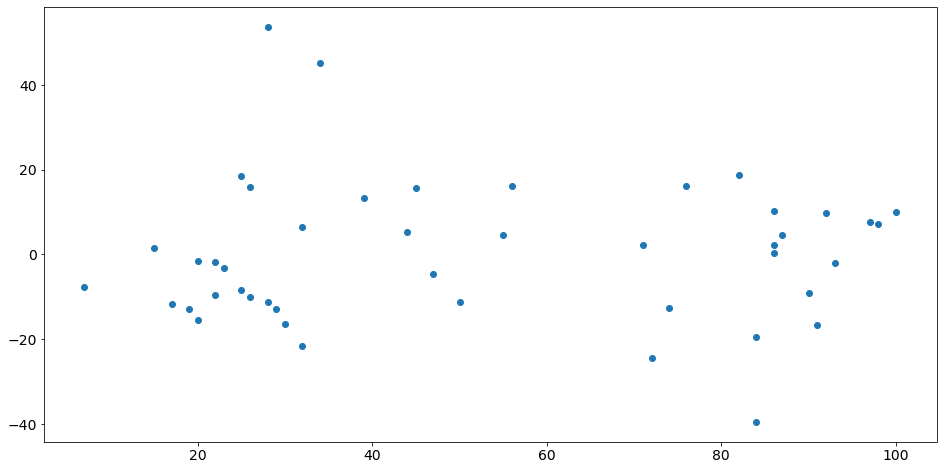

In [27]:
plt.scatter(X['education'], res)

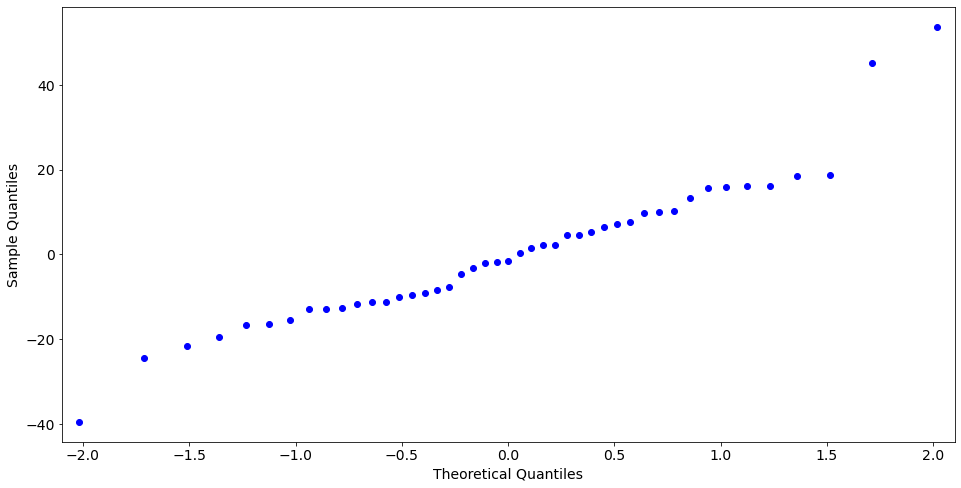

In [28]:
fig = sm.qqplot(res)
plt.show()

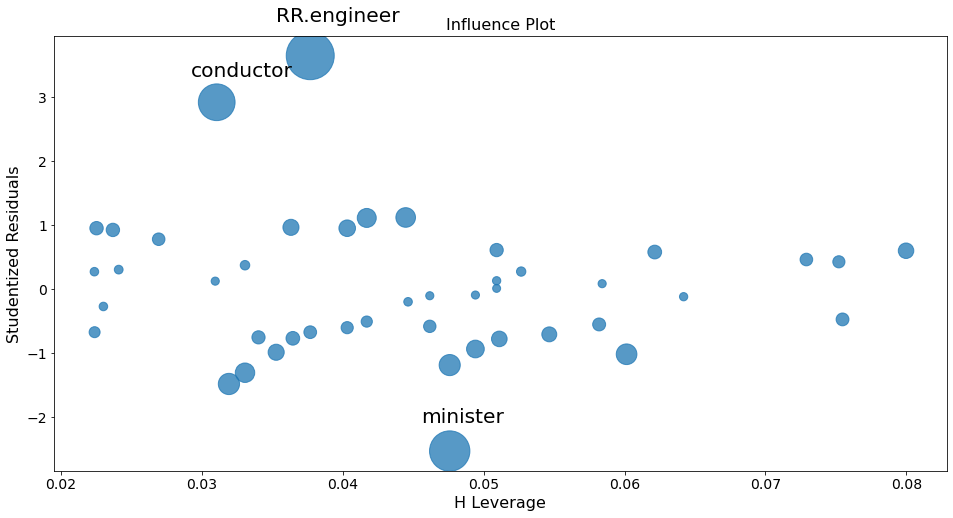

In [29]:
fig = sm.graphics.influence_plot(ols_model, criterion="cooks")

## Formula notation example


In [30]:
import statsmodels.formula.api as smf

In [31]:
model1 = smf.ols('prestige ~ education', data = duncan_prestige.data).fit()
model2 = smf.ols('prestige ~ income', data = duncan_prestige.data).fit()
model3 = smf.ols('prestige ~ income + education', data = duncan_prestige.data).fit()

In [32]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     113.8
Date:                Fri, 07 May 2021   Prob (F-statistic):           1.17e-13
Time:                        16:52:19   Log-Likelihood:                -189.50
No. Observations:                  45   AIC:                             383.0
Df Residuals:                      43   BIC:                             386.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2840      5.093      0.056      0.956      -9.987      10.555
education      0.9020      0.085     10.668      0.000       0.731       1.073
==============================================================================
Omnibus:                        1.124   Durbin-Watson:                   1.141
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.956
Skew:                           0.347   Prob(JB):                        0.620
Kurtosis:                       2.830   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     101.3
Date:                Fri, 07 May 2021   Prob (F-statistic):           7.14e-13
Time:                        16:52:19   Log-Likelihood:                -191.38
No. Observations:                  45   AIC:                             386.8
Df Residuals:                      43   BIC:                             390.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4566      5.190      0.473      0.638      -8.010      12.923
income         1.0804      0.107     10.062      0.000       0.864       1.297
==============================================================================
Omnibus:                        9.432   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               16.567
Skew:                           0.418   Prob(JB):                     0.000253
Kurtosis:                       5.853   Cond. No.                         96.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Fri, 07 May 2021   Prob (F-statistic):           8.65e-17
Time:                        16:52:19   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.163     -14.686       2.556
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Comparison

We can do a simple f-test to compare one model with another.

+ Model 1: prestige ~ education
+ Model 2: prestige ~ income
+ Model 3: prestige ~ education + income

Model 3 uses 2 degrees of freedom, while the other models only use one df. 

Is using the additional degree of freedom worth it? We can do a direct comparison between models with an F test.

In [35]:
# The results are: f-value, p-value, and the difference in df.
model3.compare_f_test(model2)

(30.862603249927922, 1.7271917188637432e-06, 1.0)

In [36]:
model3.compare_f_test(model1)

(25.033108743493933, 1.053183971490531e-05, 1.0)

In both cases, the model that uses both education and income perform significantly better than the model that only uses one variable.